In [7]:
import numpy as np
import matplotlib.pyplot as plt
from planning_utils import a_star, heuristic, create_grid, read_global_home, prune_path
import planning_utils_starter as starter

In [137]:
plt.rcParams['figure.figsize'] = 6, 6

In [3]:
data = np.loadtxt('colliders.csv', delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [141]:
TARGET_ALTITUDE = 5
SAFETY_DISTANCE = 5
grid, north_offset, east_offset = create_grid(data, TARGET_ALTITUDE, SAFETY_DISTANCE)
grid_safe_zero, _, _ = create_grid(data, TARGET_ALTITUDE, 0)

In [142]:
def plot(grid, grid_safe_zero):
    plt.imshow(grid + grid_safe_zero, origin='lower')          
    plt.xlabel('EAST')
    plt.ylabel('NORTH')
    plt.show()

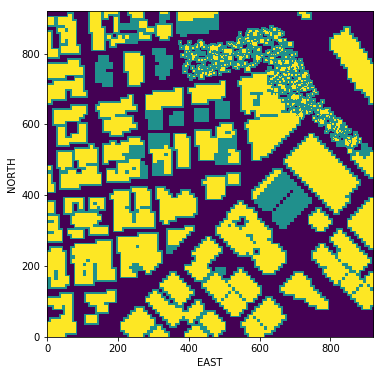

In [143]:
plot(grid, grid_safe_zero)

### A* with diagonal motion

In [87]:
grid_start = (316,  446)
grid_goal = (750., 370.)

In [88]:
starter_path, _ = starter.a_star(grid, heuristic, grid_start, grid_goal)

Found a path.


In [90]:
path, _ = a_star(grid, heuristic, grid_start, grid_goal)

Found a path.


In [126]:
def plot_paths(grid, paths, titles, grid_start=grid_start, grid_goal=grid_goal, show_waypoints=False):
    f, axs = plt.subplots(1, 2, figsize=(12, 12))
    for i,ax in enumerate(axs):
        ax.imshow(grid, origin='lower') 
        if show_waypoints:
            waypoints = np.array([[p[0], p[1], TARGET_ALTITUDE, 0] for p in paths[i]])
            ax.plot(waypoints[:, 1], waypoints[:, 0], 'g')
            ax.plot(waypoints[:, 1], waypoints[:, 0], 'o')
        else:
            pp = np.array(paths[i])
            ax.plot(pp[:, 1], pp[:, 0], 'g', lw=3)
        ax.set_title(titles[i])
        ax.plot(grid_start[1], grid_start[0], 'X')
        ax.plot(grid_goal[1], grid_goal[0], 'X')

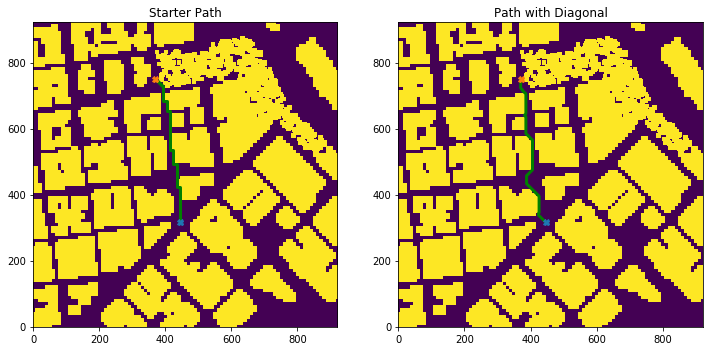

In [127]:
plot_paths(grid, paths=[starter_path, path], titles=['Starter Path', 'Path with Diagonal'])

### Cull waypoints

In [135]:
pruned_path = prune_path(path)

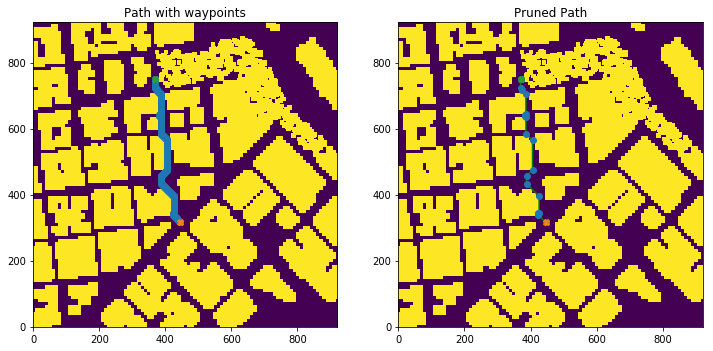

In [133]:
plot_paths(grid, paths=[path, pruned_path], titles=['Path with waypoints', 'Pruned Path'], show_waypoints=True)